# Exercise: Text Mining

Gunakan dataset Tweets.csv

Dataset ini berisi tweet yang ditujukan (mention) ke maskapai di US. Anda bekerja sebagai data scientist yang ditugaskan untuk memprediksi apakah sebuah tweet termasuk ke dalam sentiment negative (class 1) atau positive or neutral (class 0).

- Lakukan preprocessing pada semua tweet 
- Lakukan EDA. Apakah ada perbedaan antara tweet sentiment negative (class 1) dengan tweet sentiment positive or neutral (class 0)?
- Definisikan FP dan FN dalam kasus sentiment analysis ini
- Lakukan klasifikasi

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Preprocessing Part 1

1. Lowercase
1. Remove contraction
1. Remove number
1. Remove punctuation
1. Remove stopwords
1. Romove whitespace

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# label
# 0: positive or neutral
# 1: negative

df['label'] = np.where(df['airline_sentiment']=='negative', 1, 0)
df = df[['text', 'airline_sentiment', 'label']]
df

,text,airline_sentiment,label
0,@VirginAmerica What @dhepburn said.,neutral,0
1,@VirginAmerica plus you've added commercials t...,positive,0
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0
3,@VirginAmerica it's really aggressive to blast...,negative,1
4,@VirginAmerica and it's a really big bad thing...,negative,1
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,0
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,1
14637,@AmericanAir Please bring American Airlines to...,neutral,0
14638,"@AmericanAir you have my money, you change my ...",negative,1


In [4]:
df['label'].value_counts()

# 0: positive or neutral
# 1: negative

1    9178
0    5462
Name: label, dtype: int64

### 0. Hapus mention

In [5]:
text = df['text'][10]
text

'@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24'

In [6]:
[kata for kata in text.split() if not kata.__contains__('@')]

['did',
 'you',
 'know',
 'that',
 'suicide',
 'is',
 'the',
 'second',
 'leading',
 'cause',
 'of',
 'death',
 'among',
 'teens',
 '10-24']

In [7]:
def remove_mention(text):
    hasil = ' '.join([kata for kata in text.split() if not kata.__contains__('@')])
    return hasil

In [8]:
remove_mention(text)

'did you know that suicide is the second leading cause of death among teens 10-24'

### 1. Lowercase

In [9]:
contoh = "I don't know about you, but I'm feeling 22"
contoh.lower()

"i don't know about you, but i'm feeling 22"

In [10]:
def to_lower(text):
    return text.lower()

In [11]:
to_lower(contoh)

"i don't know about you, but i'm feeling 22"

### 2. Remove contraction

In [12]:
contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [13]:
contoh = "i don't know about you, but i'm feeling 22"
contoh

# ubah don't menjadi do not dan i'm menjadi i am

"i don't know about you, but i'm feeling 22"

In [14]:
# cara Mary
for key, value in contractions_dict.items():
    contoh = contoh.replace(key, value)

print(contoh)


i do not know about you, but i am feeling 22


In [15]:
# cara Eca
def remove_contraction(text):

    list_kata = text.split()
    list_hasil = []

    for kata in list_kata:

        if kata in contractions_dict.keys():
            list_hasil.append(contractions_dict[kata])
        else:
            list_hasil.append(kata)

    hasil = ' '.join(list_hasil)
    return hasil 

In [16]:
remove_contraction(contoh)

'i do not know about you, but i am feeling 22'

### 3. Remove number

In [17]:
kata = '48'
kata.isnumeric()

True

In [18]:
contoh = 'i do not know about you, but i am feeling 22'
contoh 

'i do not know about you, but i am feeling 22'

In [19]:
# menghapus angka
''.join([char for char in contoh if not char.isnumeric()])

'i do not know about you, but i am feeling '

In [20]:
def remove_number(text):
    hasil = ''.join([char for char in text if not char.isnumeric()])
    return hasil

In [21]:
remove_number(contoh)

'i do not know about you, but i am feeling '

### 4. Remove punctuation

In [22]:
from string import punctuation

In [23]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
contoh = 'i do not know about you, but i am feeling '
contoh

'i do not know about you, but i am feeling '

In [25]:
# menghapus tanda baca
''.join([char for char in contoh if not char in punctuation])

'i do not know about you but i am feeling '

In [26]:
def remove_punctuation(text):
    hasil = ''.join([char for char in text if not char in punctuation])
    return hasil

In [27]:
remove_punctuation(contoh)

'i do not know about you but i am feeling '

### 5. Remove stopwords

In [28]:
# pip install nltk

In [29]:
import nltk
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
stop_words = stopwords.words('english')

In [32]:
# 'not' tidak dianggap sebagai stopwords
stop_words.remove('not')

In [33]:
contoh = 'i do not know about you but i am feeling '

In [34]:
[kata for kata in contoh.split() if kata not in stop_words]

['not', 'know', 'feeling']

In [35]:
def remove_stopwords(text):
    hasil = ' '.join([kata for kata in text.split() if kata not in stop_words])
    return hasil 

In [36]:
remove_stopwords(contoh)

'not know feeling'

In [37]:
# mirip dengan fungsi split()
nltk.word_tokenize(contoh) 

['i', 'do', 'not', 'know', 'about', 'you', 'but', 'i', 'am', 'feeling']

### 6. Remove whitespace

In [38]:
contoh = '  not know     feeling      '

' '.join(contoh.split())

'not know feeling'

In [39]:
def remove_whitespace(text):
    hasil = ' '.join(text.split())
    return hasil

In [40]:
remove_whitespace(contoh)

'not know feeling'

### Combine all steps

In [41]:
df['prep0'] = df['text'].apply(remove_mention)
df['prep1'] = df['prep0'].apply(to_lower)
df['prep2'] = df['prep1'].apply(remove_contraction)
df['prep3'] = df['prep2'].apply(remove_number)
df['prep4'] = df['prep3'].apply(remove_punctuation)
df['prep5'] = df['prep4'].apply(remove_stopwords)
df['prep6'] = df['prep5'].apply(remove_whitespace)

df.head()

,text,airline_sentiment,label,prep0,prep1,prep2,prep3,prep4,prep5,prep6
0,@VirginAmerica What @dhepburn said.,neutral,0,What said.,what said.,what said.,what said.,what said,said,said
1,@VirginAmerica plus you've added commercials t...,positive,0,plus you've added commercials to the experienc...,plus you've added commercials to the experienc...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus added commercials experience tacky,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0,I didn't today... Must mean I need to take ano...,i didn't today... must mean i need to take ano...,i did not today... must mean i need to take an...,i did not today... must mean i need to take an...,i did not today must mean i need to take anoth...,not today must mean need take another trip,not today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,1,"it's really aggressive to blast obnoxious ""ent...","it's really aggressive to blast obnoxious ""ent...","it is really aggressive to blast obnoxious ""en...","it is really aggressive to blast obnoxious ""en...",it is really aggressive to blast obnoxious ent...,really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,1,and it's a really big bad thing about it,and it's a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,really big bad thing,really big bad thing


In [42]:
def combine_cleaning(your_series):

    df['prep0'] = df['text'].apply(remove_mention)
    df['prep1'] = df['prep0'].apply(to_lower)
    df['prep2'] = df['prep1'].apply(remove_contraction)
    df['prep3'] = df['prep2'].apply(remove_number)
    df['prep4'] = df['prep3'].apply(remove_punctuation)
    df['prep5'] = df['prep4'].apply(remove_stopwords)
    df['prep6'] = df['prep5'].apply(remove_whitespace)

    return df

In [43]:
combine_cleaning(df['text'])

,text,airline_sentiment,label,prep0,prep1,prep2,prep3,prep4,prep5,prep6
0,@VirginAmerica What @dhepburn said.,neutral,0,What said.,what said.,what said.,what said.,what said,said,said
1,@VirginAmerica plus you've added commercials t...,positive,0,plus you've added commercials to the experienc...,plus you've added commercials to the experienc...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus added commercials experience tacky,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0,I didn't today... Must mean I need to take ano...,i didn't today... must mean i need to take ano...,i did not today... must mean i need to take an...,i did not today... must mean i need to take an...,i did not today must mean i need to take anoth...,not today must mean need take another trip,not today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,1,"it's really aggressive to blast obnoxious ""ent...","it's really aggressive to blast obnoxious ""ent...","it is really aggressive to blast obnoxious ""en...","it is really aggressive to blast obnoxious ""en...",it is really aggressive to blast obnoxious ent...,really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,1,and it's a really big bad thing about it,and it's a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,really big bad thing,really big bad thing
...,...,...,...,...,...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,0,thank you we got on a different flight to Chic...,thank you we got on a different flight to chic...,thank you we got on a different flight to chic...,thank you we got on a different flight to chic...,thank you we got on a different flight to chicago,thank got different flight chicago,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,1,leaving over 20 minutes Late Flight. No warnin...,leaving over 20 minutes late flight. no warnin...,leaving over 20 minutes late flight. no warnin...,leaving over minutes late flight. no warnings...,leaving over minutes late flight no warnings ...,leaving minutes late flight warnings communica...,leaving minutes late flight warnings communica...
14637,@AmericanAir Please bring American Airlines to...,neutral,0,Please bring American Airlines to #BlackBerry10,please bring american airlines to #blackberry10,please bring american airlines to #blackberry10,please bring american airlines to #blackberry,please bring american airlines to blackberry,please bring american airlines blackberry,please bring american airlines blackberry
14638,"@AmericanAir you have my money, you change my ...",negative,1,"you have my money, you change my flight, and d...","you have my money, you change my flight, and d...","you have my money, you change my flight, and d...","you have my money, you change my flight, and d...",you have my money you change my flight and do ...,money change flight not answer phones suggesti...,money change flight not answer phones suggesti...


In [44]:
# pip install currency-symbols

In [45]:
# from currency_symbols import CurrencySymbols

In [46]:
# CurrencySymbols.get_symbol('EUR')
# CurrencySymbols.get_symbol('IDR')

## Preprocessing Part 2

Mengubah kata menjadi kata dasar.

Pilihan:
- Stemming
- Lemmatization

In [47]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer 

### Stemming

In [48]:
stemmer = SnowballStemmer('english')

kata = 'care caring cared carefully'

stemmer.stem(kata)

'care caring cared car'

In [49]:
nltk.word_tokenize(kata)

['care', 'caring', 'cared', 'carefully']

In [50]:
[stemmer.stem(i) for i in nltk.word_tokenize(kata)]

['care', 'care', 'care', 'care']

In [51]:
df['prep6'][0]

'said'

In [52]:
text = df['prep6'][0]
list_hasil = []

for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
    for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
        list_hasil.append(stemmer.stem(word))   # ubah kata ke kata dasarnya

hasil = ' '.join(list_hasil)
hasil 

'said'

In [53]:
def stem(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(stemmer.stem(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil 

In [54]:
stem(df['prep6'][0])

'said'

## Lemmatization

In [55]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
lemmatizer = WordNetLemmatizer()

kata = 'care cares cared caring carefully'

[lemmatizer.lemmatize(i) for i in nltk.word_tokenize(kata)] 

['care', 'care', 'cared', 'caring', 'carefully']

In [57]:
def lemmatize(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(lemmatizer.lemmatize(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil 

In [58]:
lemmatize(df['prep6'][0])

'said'

---
## Combine Preprocessing Part 1 & Part 2

In [59]:
df['stem'] = df['prep6'].apply(stem)
df['lemmatize'] = df['prep6'].apply(lemmatize)

df.head()

,text,airline_sentiment,label,prep0,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemmatize
0,@VirginAmerica What @dhepburn said.,neutral,0,What said.,what said.,what said.,what said.,what said,said,said,said,said
1,@VirginAmerica plus you've added commercials t...,positive,0,plus you've added commercials to the experienc...,plus you've added commercials to the experienc...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus added commercials experience tacky,plus added commercials experience tacky,plus ad commerci experi tacki,plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0,I didn't today... Must mean I need to take ano...,i didn't today... must mean i need to take ano...,i did not today... must mean i need to take an...,i did not today... must mean i need to take an...,i did not today must mean i need to take anoth...,not today must mean need take another trip,not today must mean need take another trip,not today must mean need take anoth trip,not today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,1,"it's really aggressive to blast obnoxious ""ent...","it's really aggressive to blast obnoxious ""ent...","it is really aggressive to blast obnoxious ""en...","it is really aggressive to blast obnoxious ""en...",it is really aggressive to blast obnoxious ent...,really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...,realli aggress blast obnoxi entertain guest fa...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,1,and it's a really big bad thing about it,and it's a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,really big bad thing,really big bad thing,realli big bad thing,really big bad thing


## EDA (Text Exploration)

### 1. Word Frequency

In [60]:
df['lemmatize']

0                                                     said
1                   plus added commercial experience tacky
2               not today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637             please bring american airline blackberry
14638    money change flight not answer phone suggestio...
14639    ppl need know many seat next flight plz put u ...
Name: lemmatize, Length: 14640, dtype: object

In [61]:
text = df['lemmatize']

df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document
df_text = df_text.reset_index()

df_unique = df_text[0].value_counts()
df_unique = df_unique.to_frame().reset_index().rename(columns={'index':'word', 0:'freq'})

df_unique.head(20)

,word,freq
0,flight,4541
1,not,3641
2,get,1372
3,hour,1151
4,thanks,1072
5,u,1067
6,cancelled,1056
7,service,987
8,time,942
9,customer,930


In [62]:
def word_freq(text):

    df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document
    df_text = df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={'index':'word', 0:'freq'})

    return df_unique

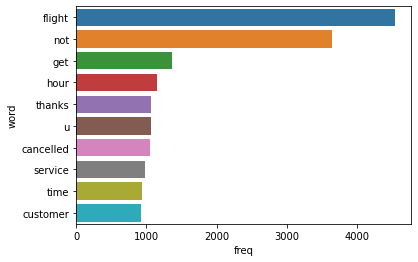

In [63]:
# Top 10 most frequent words
data = word_freq(df['lemmatize'])
sns.barplot(data=data.head(10), x='freq', y='word');

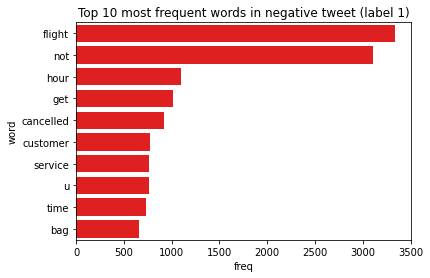

In [64]:
# Top 10 most frequent words in negative tweet (1) 
data = word_freq(df[df['label']==1]['lemmatize'])

sns.barplot(data=data.head(10), x='freq', y='word', color='red')
plt.title('Top 10 most frequent words in negative tweet (label 1)'); 

In [65]:
# df[(df['lemmatize'].str.contains('cancelled')) & (df['label']==1)]['lemmatize']

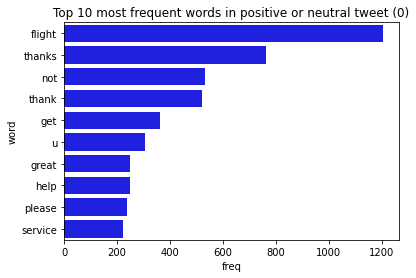

In [66]:
# Top 10 most frequent words in positive or neutral tweet (0)
data = word_freq(df[df['label']==0]['lemmatize'])

sns.barplot(data=data.head(10), x='freq', y='word', color='blue')
plt.title('Top 10 most frequent words in positive or neutral tweet (0)'); 

In [67]:
# df[(df['lemmatize'].str.contains('help')) & (df['label']==0)][['lemmatize', 'airline_sentiment']]

Summary:

- Pada tweet negative banyak muncul kata: hour, cancelled, customer, service, time, bag
    - Kemungkinan keyword 'hour', 'time' ini berkaitan dengan keterlambatan pesawat
    - Kemungkinan keyword 'customer', 'service' ini berkaitan dengan pelayanan customer service yang tidak memuaskan
    - Kemungkinan keyword 'cancelled' ini berkaitan dengan pembatalan penerbangan pesawat
<br>
<br>
- Pada tweet neutral atau positive banyak muncul kata: thanks, great, help, please, service
    - Kemungkinan keyword 'thanks', 'great',  ini berkaitan dengan pujian terhadap pelayanan dari maskapai
    - Kemungkinan keyword 'help', 'please', 'service' ini berkaitan dengan pertanyaan atau minta tolong 



### 2. Length of Document

In [68]:
# df['stem'].apply(len)

In [69]:
df['len_char'] = df['lemmatize'].str.len()
df.head()

,text,airline_sentiment,label,prep0,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemmatize,len_char
0,@VirginAmerica What @dhepburn said.,neutral,0,What said.,what said.,what said.,what said.,what said,said,said,said,said,4
1,@VirginAmerica plus you've added commercials t...,positive,0,plus you've added commercials to the experienc...,plus you've added commercials to the experienc...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus you have added commercials to the experie...,plus added commercials experience tacky,plus added commercials experience tacky,plus ad commerci experi tacki,plus added commercial experience tacky,38
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0,I didn't today... Must mean I need to take ano...,i didn't today... must mean i need to take ano...,i did not today... must mean i need to take an...,i did not today... must mean i need to take an...,i did not today must mean i need to take anoth...,not today must mean need take another trip,not today must mean need take another trip,not today must mean need take anoth trip,not today must mean need take another trip,42
3,@VirginAmerica it's really aggressive to blast...,negative,1,"it's really aggressive to blast obnoxious ""ent...","it's really aggressive to blast obnoxious ""ent...","it is really aggressive to blast obnoxious ""en...","it is really aggressive to blast obnoxious ""en...",it is really aggressive to blast obnoxious ent...,really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...,realli aggress blast obnoxi entertain guest fa...,really aggressive blast obnoxious entertainmen...,78
4,@VirginAmerica and it's a really big bad thing...,negative,1,and it's a really big bad thing about it,and it's a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,and it is a really big bad thing about it,really big bad thing,really big bad thing,realli big bad thing,really big bad thing,20


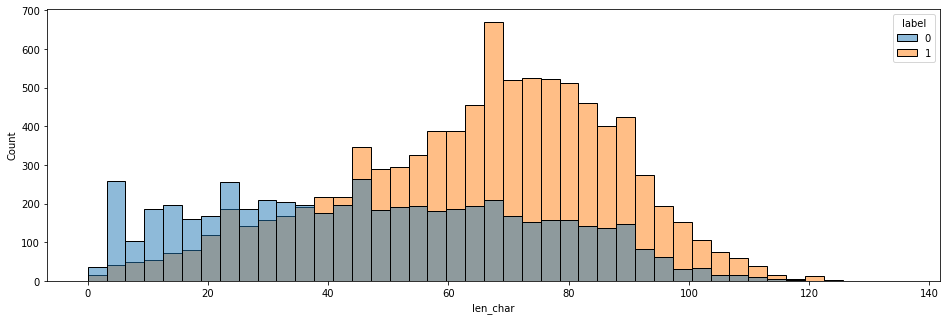

In [70]:
plt.figure(figsize=(16,5))
sns.histplot(data=df, x='len_char', hue='label');

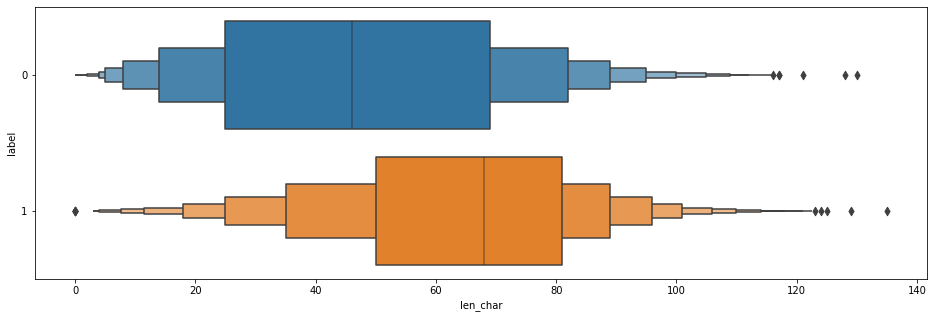

In [71]:
df['label'] = df['label'].astype(str)

plt.figure(figsize=(16,5))
sns.boxenplot(data=df, x='len_char', y='label');

In [72]:
df['label'] = df['label'].astype(int)

Summary:
- Ada kecenderungan tweet dengan sentimen negatif lebih panjang jumlah karakternya

---

## Classification

Kita bekerja sebagai Data Scientist di maskapai penerbangan dan ditugaskan untuk mendeteksi tweet dgn sentimen negatif agar nantinya
tweet tsb bisa segera dihandle oleh tim public relation (humas).

- class 0: tweet dengan sentimen neutral/positive 
- class 1: tweet dengan sentimen negative 
<br>
<br>
- FP: ML memprediksi tweetnya bersentimen negatif, padahal aktualnya bersentimen positif
- FN: ML memprediksi tweetnya bersentimen positif, padahal aktualnya bersentimen negatif
<br>

FN lebih berbahaya karena apabila ada tweet yg diprediksi bersentimen positif, kemudian tidak ada warning apapun, 
padahal tweet tsb bersentimen negatif (complain dll.), maka tujuan utamanya tidak tercapai.

Apabila FP terjadi, ada sebuah tweet bersentimen positif/neutral, tapi diprediksi bersentimen negatif sehingga muncul warning,
ini tidak masalah karena cons-nya hanya membuang waktu membaca tweet yg tidak perlu dihandle.

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, plot_precision_recall_curve, recall_score, precision_score

### Clean Dataset 

In [74]:
df_clean = df[['lemmatize', 'airline_sentiment', 'label']]
df_clean.head()

,lemmatize,airline_sentiment,label
0,said,neutral,0
1,plus added commercial experience tacky,positive,0
2,not today must mean need take another trip,neutral,0
3,really aggressive blast obnoxious entertainmen...,negative,1
4,really big bad thing,negative,1


### Define text and y

In [75]:
text = df_clean['lemmatize']
y = df_clean['label']

In [76]:
y.value_counts() / len(y)

1    0.626913
0    0.373087
Name: label, dtype: float64

### Data Splitting

In [77]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=0.2, stratify=y, random_state=0)

In [78]:
len(y_test)

2928

### Benchmark Model

Sebaiknya cari algoritma terbaik

In [87]:
# model
model = DecisionTreeClassifier(max_depth=5)

# vectorizer
vectorizer = TfidfVectorizer(norm=None)

# resampler
resampler = SMOTE(random_state=0)

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('resampler', resampler),
    ('model', model)
])

# cross validation
cv_score = cross_val_score(
    model_pipe,
    text_train,
    y_train,
    cv=5,
    scoring='recall'
)

print(cv_score)
print(cv_score.mean())
print(cv_score.std())

[0.43362832 0.42818244 0.43324251 0.44959128 0.44482289]
0.4378934862730768
0.007987274232466436


## Hyperparameter Tuning

In [88]:
vectorizer1 = CountVectorizer(ngram_range=(1,1))
vectorizer2 = TfidfVectorizer(norm=None)

In [89]:
# hyperparam space Decision Tree
hyperparam_space = {
    'model__max_depth': range(2,30),
    'model__min_samples_leaf': range(2,1000,2),
    'model__min_samples_split': range(2,1000,2),
    'vectorizer': [vectorizer1, vectorizer2],
    'resampler': [SMOTE(), NearMiss()]
}

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer1),
    ('resampler',resampler),
    ('model', model)
])

# randomized search
random_search = RandomizedSearchCV(
    estimator= model_pipe,
    param_distributions= hyperparam_space,
    scoring='recall',
    cv=5,
    random_state=0,
    n_jobs=-1,
    n_iter= 200
)

In [90]:
# fit
random_search.fit(text_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('resampler',
                                              SMOTE(random_state=0)),
                                             ('model',
                                              DecisionTreeClassifier(max_depth=5))]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__max_depth': range(2, 30),
                                        'model__min_samples_leaf': range(2, 1000, 2),
                                        'model__min_samples_split': range(2, 1000, 2),
                                        'resampler': [SMOTE(), NearMiss()],
                                        'vectorizer': [CountVectorizer(),
                                                       TfidfVectorizer(norm=None)]},
                   random_state=0, scoring='recall')

In [91]:
random_search.best_params_

{'vectorizer': TfidfVectorizer(norm=None),
 'resampler': SMOTE(),
 'model__min_samples_split': 760,
 'model__min_samples_leaf': 20,
 'model__max_depth': 26}

In [92]:
random_search.best_score_

0.7480246622755846

## Predict to Test Set

Before Tuning

In [93]:
# model
model = DecisionTreeClassifier(max_depth=5)

# vectorizer
vectorizer = TfidfVectorizer(norm=None)

# resampler
resampler = SMOTE(random_state=0)

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('resampler', resampler),
    ('model', model)
])

# fitting
model_pipe.fit(text_train, y_train)

# predict
y_pred_before = model_pipe.predict(text_test)

# f1 score
f1_score(y_test, y_pred_before)


0.5907602764641688

After Tuning

In [94]:
best_model = random_search.best_estimator_

# fitting
best_model.fit(text_train, y_train)

# predict
y_pred_after = best_model.predict(text_test)

# f1 score
f1_score(y_test, y_pred_after)

0.7969924812030075

Text(0.5, 1.0, 'After Tuning')

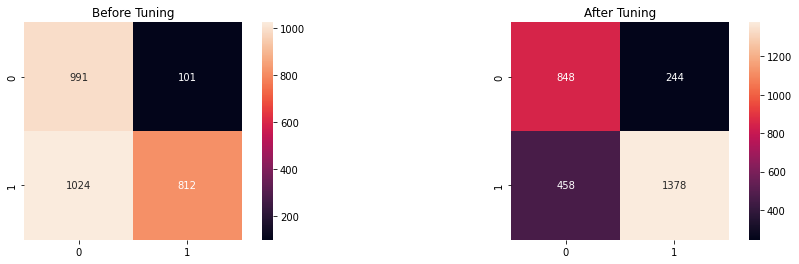

In [95]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True)
plt.title('Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True)
plt.title('After Tuning')


In [96]:
# Performa model meningkat setelah dilakukan hyperpameter tuning

print(f1_score(y_test, y_pred_before), 'Before hyperpameter tuning')
print(f1_score(y_test, y_pred_after), 'After hyperpameter tuning')

0.5907602764641688 Before hyperpameter tuning
0.7969924812030075 After hyperpameter tuning


### Kesimpulan

- FP: kita prediksi tweet bersentimen negatif (contoh: tweet complain), padahal aktualnya bersentimen positif/netral (contoh: tweet apresiasi)
- FN: kita prediksi tweet bersentimen positif/netral (contoh: tweet apresiasi), padahal aktualnya bersentimen negatif (contoh: tweet complain)

FN lebih berbahaya dari pada FP. Karena jika kita memprediksi sebuah tweet sebagai tweet yg bersentimen positif/netral (contoh: tweet apresiasi),
maka kita tidak menjadikan tweet tersebut sebagai prioritas untuk direspon, padahal tweet tetsebut bersentimen negatif. Efeknya user akan mengaggap
maskapai kita punya service yang buruk.

Usaha lain yang bisa kita coba untuk menurunkan FN adalah dengan mengatur nilai threshold.

---
### Coba: Optimized Threshold

In [105]:
# model
best_model = random_search.best_estimator_

# fitting
best_model.fit(text_train, y_train)

list_threshold = np.arange(0.01, 0.99, 0.01)
list_score = []
list_tp = []
list_tn = []
list_fp = []
list_fn = []

for threshold in list_threshold:

    # predict
    y_pred_proba = best_model.predict_proba(text_test)[:,1]
    y_pred = np.where(y_pred_proba > threshold, 1, 0)

    # score
    score = recall_score(y_test, y_pred)
    list_score.append(score)

    # confusion matrix
    tp = confusion_matrix(y_test, y_pred)[1, 1]
    tn = confusion_matrix(y_test, y_pred)[0, 0]
    fp = confusion_matrix(y_test, y_pred)[0, 1]
    fn = confusion_matrix(y_test, y_pred)[1, 0]

    list_tp.append(tp)
    list_tn.append(tn)
    list_fp.append(fp)
    list_fn.append(fn)

In [110]:
df_score = pd.DataFrame({
    'threshold': list_threshold,
    'score': list_score,
    'tp':list_tp,
    'tn':list_tn,
    'fp':list_fp,
    'fn':list_fn
}).sort_values(['score', 'threshold'], ascending=[False, True])

df_score.head(50)

,threshold,score,tp,tn,fp,fn
0,0.01,1.000000,1836,0,1092,0
1,0.02,1.000000,1836,0,1092,0
2,0.03,1.000000,1836,0,1092,0
3,0.04,1.000000,1836,0,1092,0
4,0.05,0.997277,1831,84,1008,5
5,0.06,0.997277,1831,84,1008,5
6,0.07,0.997277,1831,84,1008,5
7,0.08,0.984205,1807,175,917,29
8,0.09,0.984205,1807,175,917,29
9,0.10,0.984205,1807,175,917,29


In [123]:
# model
best_model = random_search.best_estimator_

# fitting
best_model.fit(text_train, y_train)

# predict
y_pred_proba = best_model.predict_proba(text_test)[:,1]

threshold=0.27
y_pred = np.where(y_pred_proba > threshold, 1, 0)

# f1 score
score = recall_score(y_test, y_pred)
score

0.9776688453159041

In [124]:
confusion_matrix(y_test, y_pred)

array([[ 216,  876],
       [  41, 1795]], dtype=int64)